## Machine Learning
Machine learning is  the most popular technique of predictiong the future or classifying information to help people in making necessary decisionns.

### Scales of Measurement
In general, variables can be measured on four different scales. Mean, median, and
mode are the way to understand the central tendency, that is, the middle point of data
distribution. Standard deviation, variance, and range are the most commonly used
dispersion measures used to understand the spread of the data.

#### Nominal Scale of Measurement
Data are measured at the nominal level when each case is classified into one of a number
of discrete categories. This is also called categorical, that is, used only for classification.
As mean is not meaningful, all that we can do is to count the number of occurrences
of each type and compute the proportion (number of occurrences of each type / total
occurrences).

![nominal.png](data/nominal.png)

#### Ordinal Scale of Measurement
Data are measured on an ordinal scale if the categories imply order. The difference
between ranks is consistent in direction and authority, but not magnitude.

#### Interval Scale of Measurement
If the differences between values have meanings, the data are measured at the interval
scale.

![interval.png](data/interval.png)

#### Ratio Scale of Measurement
Data measured on a ratio scale have differences that are meaningful, and relate to some
true zero point. This is the most common scale of measurement.

![ratio.png](data/ratio.png)

### Comparison of the different scales of measurement

![comp.png](data/comp.png)

### Feature Engineering
The output or the prediction quality of any machine learning algorithm depends
predominantly on the quality of input being passed. The process of creating appropriate
data features by applying business context is called feature engineering.

![feature.png](data/feature.png)

### Dealing with Missing Data
Missing data can mislead or create problems for analyzing the data. In order to avoid
any such issues, you need to impute missing data. There are four most commonly used
techniques for data imputation.

1.Delete

2.Replace with summary

3.Random replace

4.Using predictive model`


## Handling Categorical Data
Most of the machine’s learning libraries are designed to work well with numerical
variables.

### Create dummy variable:
This is a Boolean variable that indicates the presence of
a category with the value 1 and 0 for absence.

#### Creating dummy variables

In [1]:
import pandas as pd
from patsy import dmatrices
df = pd.DataFrame({'A': ['high', 'medium', 'low'],
'B': [10,20,30]},
index=[0, 1, 2])
df

,A,B
0,high,10
1,medium,20
2,low,30


In [2]:
# using get_dummies function of pandas package
df_with_dummies= pd.get_dummies(df, prefix='A', columns=['A'])
print (df_with_dummies)

    B  A_high  A_low  A_medium
0  10       1      0         0
1  20       0      0         1
2  30       0      1         0


### Convert to number: 
Another simple method is to represent the text description
of each level with a number by using the ‘Label Encoder’ function of Scikit-learn. If the
number of levels are high (example zip code, state, etc.), then you apply the business logic
to combine levels to groups.

#### Converting categorical variable to numerics

In [3]:
# using pandas package's factorize function
df['A_pd_factorized'] = pd.factorize(df['A'])[0]

# Alternatively you can use sklearn package's LabelEncoder function
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['A_LabelEncoded'] = le.fit_transform(df.A)
print (df)

        A   B  A_pd_factorized  A_LabelEncoded
0    high  10                0               0
1  medium  20                1               2
2     low  30                2               1


## Normalizing Data
Normalizing data can be achieved by Min-Max scaling; the formula is given below,
which will scale all numeric values in the range 0 to 1

![normalized.png](data/normalized.png)

The standardization technique will transform the variables to have a zero mean
and standard deviation of one. The formula for standardization is given below and the
outcome is commonly known as z-scores.

![norma1.png](data/norma1.png)

Where μ is the mean and σ is the standard deviation.

#### Normalization and scaling

In [4]:
from sklearn import datasets
import numpy as np
from sklearn import preprocessing

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

std_scale = preprocessing.StandardScaler().fit(X)
X_std = std_scale.transform(X)

minmax_scale = preprocessing.MinMaxScaler().fit(X)
X_minmax = minmax_scale.transform(X)

print('Mean before standardization: petal length={:.1f}, petal width={:.1f}' .format(X[:,0].mean(), X[:,1].mean()))

print('SD before standardization: petal length={:.1f}, petal width={:.1f}' .format(X[:,0].std(), X[:,1].std()))

print('Mean after standardization: petal length={:.1f}, petal width={:.1f}' .format(X_std[:,0].mean(), X_std[:,1].mean()))

print('SD after standardization: petal length={:.1f}, petal width={:.1f}' .format(X_std[:,0].std(), X_std[:,1].std()))

print('\nMin value before min-max scaling: patel length={:.1f}, patel width={:.1f}' .format(X[:,0].min(), X[:,1].min()))

print('Max value before min-max scaling: petal length={:.1f}, petal width={:.1f}' .format(X[:,0].max(), X[:,1].max()))

print('Min value after min-max scaling: patel length={:.1f}, patel width={:.1f}' .format(X_minmax[:,0].min(), X_minmax[:,1].min()))

print('Max value after min-max scaling: petal length={:.1f}, petal width={:.1f}' .format(X_minmax[:,0].max(), X_minmax[:,1].max()))

Mean before standardization: petal length=3.8, petal width=1.2
SD before standardization: petal length=1.8, petal width=0.8
Mean after standardization: petal length=-0.0, petal width=-0.0
SD after standardization: petal length=1.0, petal width=1.0

Min value before min-max scaling: patel length=1.0, patel width=0.1
Max value before min-max scaling: petal length=6.9, petal width=2.5
Min value after min-max scaling: patel length=0.0, patel width=0.0
Max value after min-max scaling: petal length=1.0, petal width=1.0


## Exploratory Data Analysis (EDA)
EDA is all about understanding your data by employing summarizing and visualizing
techniques. At a high level the EDA can be performed in two folds, that is, univariate
analysis and multivariate analysis.

#### Univariate Analysis
Individual variables are analyzed in isolation to have a better understanding about them.
Pandas provide the describe function to create summary statistics in tabular format for all
variables. These statistics are very useful for numerical types of variables to understand
any quality issues such as missing values and the presence of outliers.

#### Univariate analysis

In [5]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
iris = datasets.load_iris()

# Let's convert to dataframe
iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
columns= iris['feature_names'] + ['species'])

# replace the values with class labels
iris.species = np.where(iris.species == 0.0, 'setosa', np.where(iris.
species==1.0,'versicolor', 'virginica'))

# let's remove spaces from column name
iris.columns = iris.columns.str.replace(' ','')
iris.describe()

,sepallength(cm),sepalwidth(cm),petallength(cm),petalwidth(cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
print (iris['species'].value_counts())

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


#### Pandas dataframe visualization

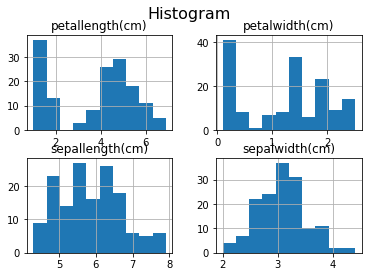

In [7]:
# Set the size of the plot
#plt.figsize(15, 8)
iris.hist() # plot histogram
plt.suptitle("Histogram", fontsize=16) # use suptitle to add title to all sublots
plt.show()

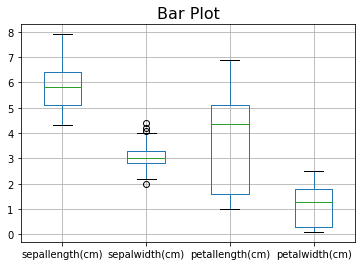

In [8]:
iris.boxplot() # plot boxplot
plt.title("Bar Plot", fontsize=16)
plt.show()

### Multivariate Analysis
In multivariate analysis you try to establish a sense of relationship of all variables with
one other.

#### Multivariate analysis

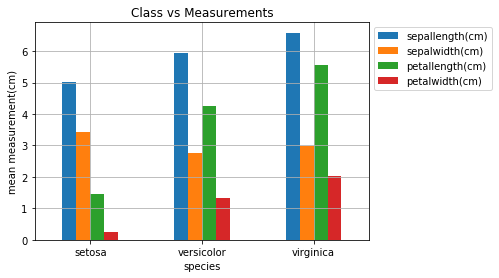

In [9]:
# print the mean for each column by species
iris.groupby(by = "species").mean()

# plot for mean of each feature for each label class
iris.groupby(by = "species").mean().plot(kind="bar")
plt.title('Class vs Measurements')
plt.ylabel('mean measurement(cm)')
plt.xticks(rotation=0) # manage the xticks rotation
plt.grid(True)

# Use bbox_to_anchor option to place the legend outside plot area to be tidy
plt.legend(loc="upper left", bbox_to_anchor=(1,1))

### Correlation Matrix
The correlation function uses Pearson correlation coefficient, which results in a number
between -1 to 1.

#### Correlation matrix

                 sepallength(cm)  sepalwidth(cm)  petallength(cm)  \
sepallength(cm)         1.000000       -0.117570         0.871754   
sepalwidth(cm)         -0.117570        1.000000        -0.428440   
petallength(cm)         0.871754       -0.428440         1.000000   
petalwidth(cm)          0.817941       -0.366126         0.962865   

                 petalwidth(cm)  
sepallength(cm)        0.817941  
sepalwidth(cm)        -0.366126  
petallength(cm)        0.962865  
petalwidth(cm)         1.000000  


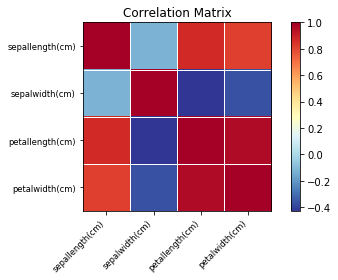

In [11]:
# create correlation matrix
corr = iris.corr()
print(corr)
import statsmodels.api as sm
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

### Feature Construction or Generation
Machine learning algorithms give best results only when we provide it the best possible
features that structure the underlying form of the problem that you are trying to address.
Often these features have to be manually created by spending a lot of time with actual raw
data and trying to understand its relationship with all other data that you have collected
to address a business problem.